In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

import random

In [2]:
# 데이터 불러오기
plant1 = pd.read_csv('plant1_train_merge.csv')
plant2 = pd.read_csv('plant2_train_merge.csv')
test =  pd.read_csv('test.csv', index_col=0)

# 결측행 제거
plant1_notnull = plant1.dropna(how='any')
plant2_notnull = plant2.dropna(how='any')

In [3]:
# 1, 0 비율
print('loc1 value counts\n')
print(plant1['plant1_train.cond_loc1'].value_counts())
print(plant1_notnull['plant1_train.cond_loc1'].value_counts(),'\n\n')

print('loc2 value counts\n')
print(plant1['plant1_train.cond_loc2'].value_counts())
print(plant1_notnull['plant1_train.cond_loc2'].value_counts(),'\n\n')

print('loc3 value counts\n')
print(plant1['plant1_train.cond_loc3'].value_counts())
print(plant1_notnull['plant1_train.cond_loc3'].value_counts(),'\n\n')

loc1 value counts

0.0    57604
1.0      275
Name: plant1_train.cond_loc1, dtype: int64
0.0    57579
1.0      275
Name: plant1_train.cond_loc1, dtype: int64 


loc2 value counts

0.0    58142
1.0      487
Name: plant1_train.cond_loc2, dtype: int64
0.0    57369
1.0      485
Name: plant1_train.cond_loc2, dtype: int64 


loc3 value counts

0.0    57959
1.0      645
Name: plant1_train.cond_loc3, dtype: int64
0.0    57226
1.0      628
Name: plant1_train.cond_loc3, dtype: int64 




In [4]:
# 이슬점 함수

def dewpoint(temp, humid):
    return ((243.12 *((17.62 * temp /(243.12 + temp))
                     + np.log(humid / 100.0))) / (17.62-((17.62 * temp / (243.12 + temp)) + np.log(humid/ 100.0))))

In [5]:
# plant1 학습 데이터셋

plant1_loc1_24 = plant1.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant1_loc2_24 = plant1.iloc[:,[0,4,5,6,10,11, 13, 17,18,16]]
plant1_loc3_24 = plant1.iloc[:,[0,7,8,9,10,11, 14, 17,18,16]]

plant1_loc1_48 = plant1.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant1_loc2_48 = plant1.iloc[:,[0,4,5,6,10,11, 13, 20,21,19]]
plant1_loc3_48 = plant1.iloc[:,[0,7,8,9,10,11, 14, 20,21,19]]

temp_df = plant1_loc1_24.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc1_24 = plant1_loc1_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc2_24.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc2_24 = plant1_loc2_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc3_24.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc3_24 = plant1_loc3_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')


temp_df = plant1_loc1_48.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc1_48 = plant1_loc1_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc2_48.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc2_48 = plant1_loc2_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc3_48.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc3_48 = plant1_loc3_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')

plant1_loc1_24.dropna(how='any', inplace=True)
plant1_loc2_24.dropna(how='any', inplace=True)
plant1_loc3_24.dropna(how='any', inplace=True)
plant1_loc1_48.dropna(how='any', inplace=True)
plant1_loc2_48.dropna(how='any', inplace=True)
plant1_loc3_48.dropna(how='any', inplace=True)

plant1_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']

plant1_loc1_24['loc'] = 1
plant1_loc2_24['loc'] = 2
plant1_loc3_24['loc'] = 3
plant1_loc1_48['loc'] = 1
plant1_loc2_48['loc'] = 2
plant1_loc3_48['loc'] = 3

plant1_24 = pd.concat([plant1_loc1_24, plant1_loc2_24, plant1_loc3_24])
plant1_48 = pd.concat([plant1_loc1_48, plant1_loc2_48, plant1_loc3_48])

# plant2 학습 데이터셋

plant2_loc1_24 = plant2.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant2_loc2_24 = plant2.iloc[:,[0,1,2,3,10,11, 13, 17,18,16]]
plant2_loc3_24 = plant2.iloc[:,[0,1,2,3,10,11, 14, 17,18,16]]

plant2_loc1_48 = plant2.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant2_loc2_48 = plant2.iloc[:,[0,1,2,3,10,11, 13, 20,21,19]]
plant2_loc3_48 = plant2.iloc[:,[0,1,2,3,10,11, 14, 20,21,19]]

temp_df = plant2_loc1_24.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc1_24 = plant2_loc1_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc2_24.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc2_24 = plant2_loc2_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc3_24.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc3_24 = plant2_loc3_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')

temp_df = plant2_loc1_48.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc1_48 = plant2_loc1_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc2_48.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc2_48 = plant2_loc2_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc3_48.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc3_48 = plant2_loc3_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')

plant2_loc1_24.dropna(how='any', inplace=True)
plant2_loc2_24.dropna(how='any', inplace=True)
plant2_loc3_24.dropna(how='any', inplace=True)
plant2_loc1_48.dropna(how='any', inplace=True)
plant2_loc2_48.dropna(how='any', inplace=True)
plant2_loc3_48.dropna(how='any', inplace=True)

plant2_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']

plant2_loc1_24['loc'] = 1
plant2_loc2_24['loc'] = 2
plant2_loc3_24['loc'] = 3
plant2_loc1_48['loc'] = 1
plant2_loc2_48['loc'] = 2
plant2_loc3_48['loc'] = 3

# LOC 병합
plant2_24 = pd.concat([plant2_loc1_24, plant2_loc2_24, plant2_loc3_24])
plant2_48 = pd.concat([plant2_loc1_48, plant2_loc2_48, plant2_loc3_48])

plant1_24['plant'] = 1
plant1_48['plant'] = 1

plant2_24['plant'] = 2
plant2_48['plant'] = 2

# plant 병합
plant_24 = pd.concat([plant1_24, plant2_24], ignore_index=True)
plant_24 = plant_24.sort_values('today').reset_index(drop=True)

plant_48 = pd.concat([plant1_48, plant2_48], ignore_index=True)
plant_48 = plant_48.sort_values('today').reset_index(drop=True)

In [6]:
plant_24['datetime_24'] = plant_24['datetime_24'].astype('datetime64')
plant_48['datetime_24'] = plant_48['datetime_24'].astype('datetime64')

month = []
day = []

for i in range(len(plant_24['datetime_24'])) :
    month.append(plant_24['datetime_24'][i].month)
    day.append(plant_24['datetime_24'][i].day)
    
plant_24['month'] = month
plant_24['day'] = day

month = []
day = []

for i in range(len(plant_48['datetime_24'])) :
    month.append(plant_48['datetime_24'][i].month)
    day.append(plant_48['datetime_24'][i].day)
    
plant_48['month'] = month
plant_48['day'] = day

# DNN 모델

In [7]:
from keras_tqdm import TQDMNotebookCallback
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model
from tensorflow.keras.models import load_model

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


## 24h 모델

In [10]:
x = plant_24.iloc[:,[1,2,3,4,5,7,8]]
y = plant_24.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

In [11]:
print(train_x.shape)
print(train_y.shape)

(241819, 7)
(241819, 5)


In [12]:
# callback 함수
es = EarlyStopping(patience=20)
tqdm = TQDMNotebookCallback()

In [230]:
# DNN 모델
model = Sequential()
model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [235]:
model.evaluate(test_x, test_y, batch_size=4096)

103638/103638 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 4us/step


[16.72293100548641, 2.365368366241455]

In [81]:
plant_24.loc['2017-02':'2019',['temp_in','hum_in','temp_coil','temp_out','hum_out','temp_24','hum_24']]

temp_in  hum_in  temp_coil  temp_out  hum_out  temp_24  \
today                                                                         
2017-02-01 00:00:00     4.14   32.23       3.46     -1.26    41.64     -6.0   
2017-02-01 00:00:00     1.09   39.84       1.06     -4.68    67.92     -6.0   
2017-02-01 00:00:00     1.94   37.24       1.51     -1.26    41.64     -6.0   
2017-02-01 00:00:00     1.09   39.84       1.06     -4.68    67.92     -6.0   
2017-02-01 00:00:00     1.67   39.13       0.75     -1.26    41.64     -6.0   
...                      ...     ...        ...       ...      ...      ...   
2019-03-30 23:40:00     9.51   51.53       9.22      5.21    71.70      3.0   
2019-03-30 23:40:00     9.51   51.53       9.22      5.21    71.70      3.0   
2019-03-30 23:50:00    10.09   54.58      10.56      6.49    63.10      3.0   
2019-03-30 23:50:00    10.52   52.32      11.43      6.49    63.10      3.0   
2019-03-30 23:50:00    10.03   54.79      10.21      6.49    63.10      3.0   

                        hum_24  
today                           
2017-02-01 00:00:00  60.000000  
2017-02-01 00:00:00  60.000000  
2017-02-01 00:00:00  60.000000  
2017-02-01 00:00:00  60.000000  
2017-02-01 00:00:00  60.000000  
...                        ...  
2019-03-30 23:40:00  59.444444  
2019-03-30 23:40:00  59.444444  
2019-03-30 23:50:00  59.722222  
2019-03-30 23:50:00  59.722222  
2019-03-30 23:50:00  59.722222  

[331016 rows x 7 columns]

In [135]:
# 2017로 train 2018로 test

plant_24.today = plant_24.today.astype('datetime64')

plant_24.index = plant_24.today

train_x = plant_24.loc['2017',['temp_in','hum_in','temp_coil','temp_out','hum_out','temp_24','hum_24']]
train_y = plant_24.loc['2017',['temp_in_y','hum_in_y','temp_coil_y','temp_out_y','hum_out_y']]
test_x = plant_24.loc['2018',['temp_in','hum_in','temp_coil','temp_out','hum_out','temp_24','hum_24']]
test_y = plant_24.loc['2018',['temp_in_y','hum_in_y','temp_coil_y','temp_out_y','hum_out_y']]


train_x = plant_24.loc['2017-02':'2019',['temp_in','hum_in','temp_coil','temp_out','hum_out','temp_24','hum_24']]
train_y = plant_24.loc['2017-02':'2019',['temp_in_y','hum_in_y','temp_coil_y','temp_out_y','hum_out_y']]

In [85]:
# callback 함수
es = EarlyStopping(patience=20)
tqdm = TQDMNotebookCallback()

# DNN 모델
model = Sequential()
model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=4096, validation_data=[train_x,train_y], verbose=0, callbacks=[es, tqdm]) 

In [136]:
model.evaluate(train_x, train_y, batch_size=4096)

331016/331016 [==============================] - 2s 5us/step


[9.638151686098846, 1.8392441272735596]

In [95]:
model.save('model_24(1.83).h5')

In [161]:
pred_y = model.predict(train_x)

pred_y = pd.DataFrame(pred_y)

pred_y

0          1          2         3          4
0        1.716777  33.034687   2.711267  0.000000  48.393391
1        2.519429  33.702843   2.018092  0.000000  48.710587
2        0.215374  40.504459   0.622641  0.000000  46.366936
3        2.519429  33.702843   2.018092  0.000000  48.710587
4        0.000000  39.825439   0.008339  0.000000  44.914177
...           ...        ...        ...       ...        ...
331011   9.543851  42.269016   8.964603  4.302410  56.725624
331012   9.543851  42.269016   8.964603  4.302410  56.725624
331013   9.784268  41.892315  10.270822  6.308625  47.885155
331014  10.362373  40.061729  10.951272  6.085216  47.839714
331015   9.589238  43.482746  10.002728  6.237276  49.568260

[331016 rows x 5 columns]

In [162]:
for i in range(5) :
    print(test_y.columns[i])
    print(mean_absolute_error(pred_y.iloc[:,i], train_y.iloc[:,i]))

temp_in_y
0.6555809470272028
hum_in_y
2.825635797974048
temp_coil_y
0.4763543643780566
temp_out_y
1.2099703532534634
hum_out_y
4.028678679312976


In [163]:
pred_target = plant_24.loc['2017-02':'2019',['target_y','loc']]

In [164]:
pred_target.reset_index(inplace=True, drop=True)

In [165]:
pred_y = pd.concat([pred_y, pred_target], axis=1)

In [166]:
pred_y['dewpoint'] = dewpoint(pred_y[0], pred_y[1])

pred_y['diff'] = pred_y[2] - pred_y['dewpoint']
pred_y

0          1          2         3          4  target_y  loc  \
0        1.716777  33.034687   2.711267  0.000000  48.393391       0.0    1   
1        2.519429  33.702843   2.018092  0.000000  48.710587       0.0    1   
2        0.215374  40.504459   0.622641  0.000000  46.366936       0.0    2   
3        2.519429  33.702843   2.018092  0.000000  48.710587       0.0    3   
4        0.000000  39.825439   0.008339  0.000000  44.914177       0.0    3   
...           ...        ...        ...       ...        ...       ...  ...   
331011   9.543851  42.269016   8.964603  4.302410  56.725624       0.0    1   
331012   9.543851  42.269016   8.964603  4.302410  56.725624       0.0    3   
331013   9.784268  41.892315  10.270822  6.308625  47.885155       0.0    1   
331014  10.362373  40.061729  10.951272  6.085216  47.839714       0.0    2   
331015   9.589238  43.482746  10.002728  6.237276  49.568260       0.0    3   

         dewpoint       diff  
0      -12.859832  15.571098  
1      -11.900414  13.918506  
2      -11.666752  12.289393  
3      -11.900414  13.918506  
4      -12.072486  12.080825  
...           ...        ...  
331011  -2.668669  11.633272  
331012  -2.668669  11.633272  
331013  -2.571921  12.842743  
331014  -2.653619  13.604891  
331015  -2.244734  12.247462  

[331016 rows x 9 columns]

In [167]:
pred_y_loc1 = pred_y[pred_y['loc']==1]
pred_y_loc2 = pred_y[pred_y['loc']==2]
pred_y_loc3 = pred_y[pred_y['loc']==3]

pred_y_loc1.reset_index(inplace=True, drop=True)
pred_y_loc2.reset_index(inplace=True, drop=True)
pred_y_loc3.reset_index(inplace=True, drop=True)

In [168]:
pred_y_loc1

0          1          2         3          4  target_y  loc  \
0        1.716777  33.034687   2.711267  0.000000  48.393391       0.0    1   
1        2.519429  33.702843   2.018092  0.000000  48.710587       0.0    1   
2        1.186345  35.650524   0.960535  0.000000  52.507423       0.0    1   
3        3.515989  35.064785   3.500576  0.000000  51.423492       0.0    1   
4        1.892409  33.193325   1.724009  0.000000  52.445259       0.0    1   
...           ...        ...        ...       ...        ...       ...  ...   
110350   9.500773  42.371738   9.126166  4.562258  56.086128       0.0    1   
110351  10.080271  40.492855  10.486959  6.483758  46.539345       0.0    1   
110352  10.021142  40.930511  10.485244  6.436844  46.858017       0.0    1   
110353   9.543851  42.269016   8.964603  4.302410  56.725624       0.0    1   
110354   9.784268  41.892315  10.270822  6.308625  47.885155       0.0    1   

         dewpoint       diff  
0      -12.859832  15.571098  
1      -11.900414  13.918506  
2      -12.385840  13.346375  
3      -10.518373  14.018950  
4      -12.645108  14.369117  
...           ...        ...  
110350  -2.674929  11.801095  
110351  -2.763241  13.250200  
110352  -2.671522  13.156765  
110353  -2.668669  11.633272  
110354  -2.571921  12.842743  

[110355 rows x 9 columns]

Text(0.5, 1.0, 'loc 1')

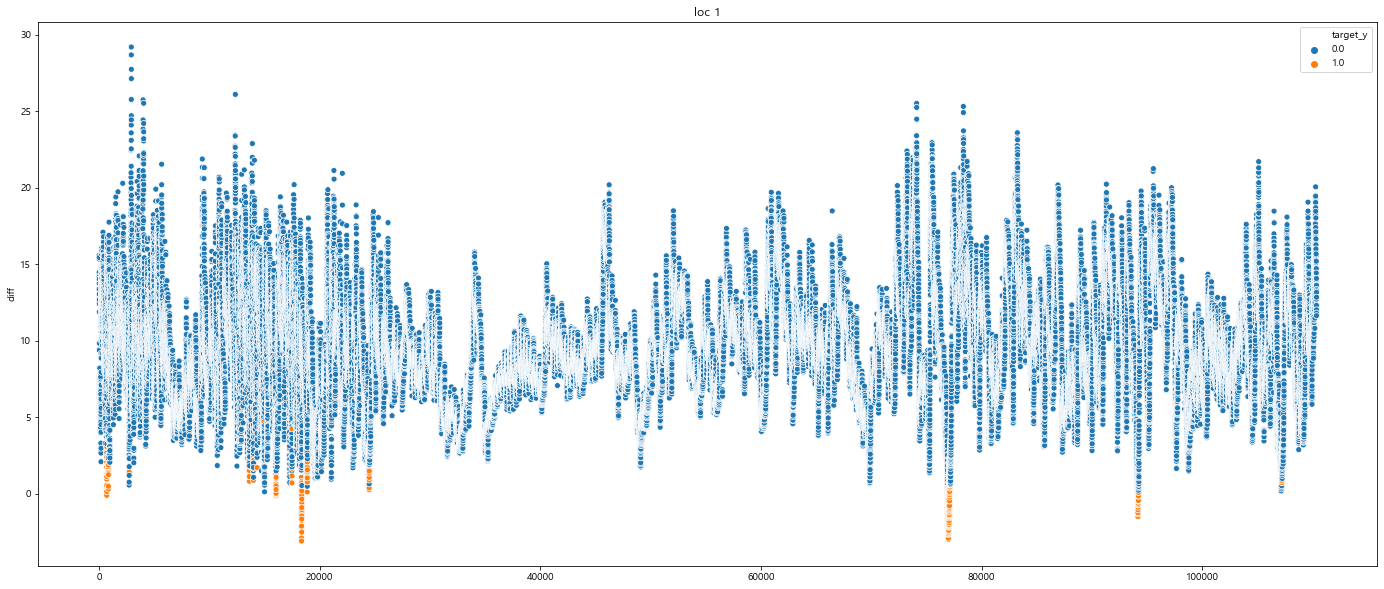

In [172]:
plt.figure(figsize=(24,10))
sns.scatterplot(x=range(len(pred_y_loc1)) , y='diff', hue='target_y', data=pred_y_loc1)
plt.title('loc 1')

Text(0.5, 1.0, 'loc 2')

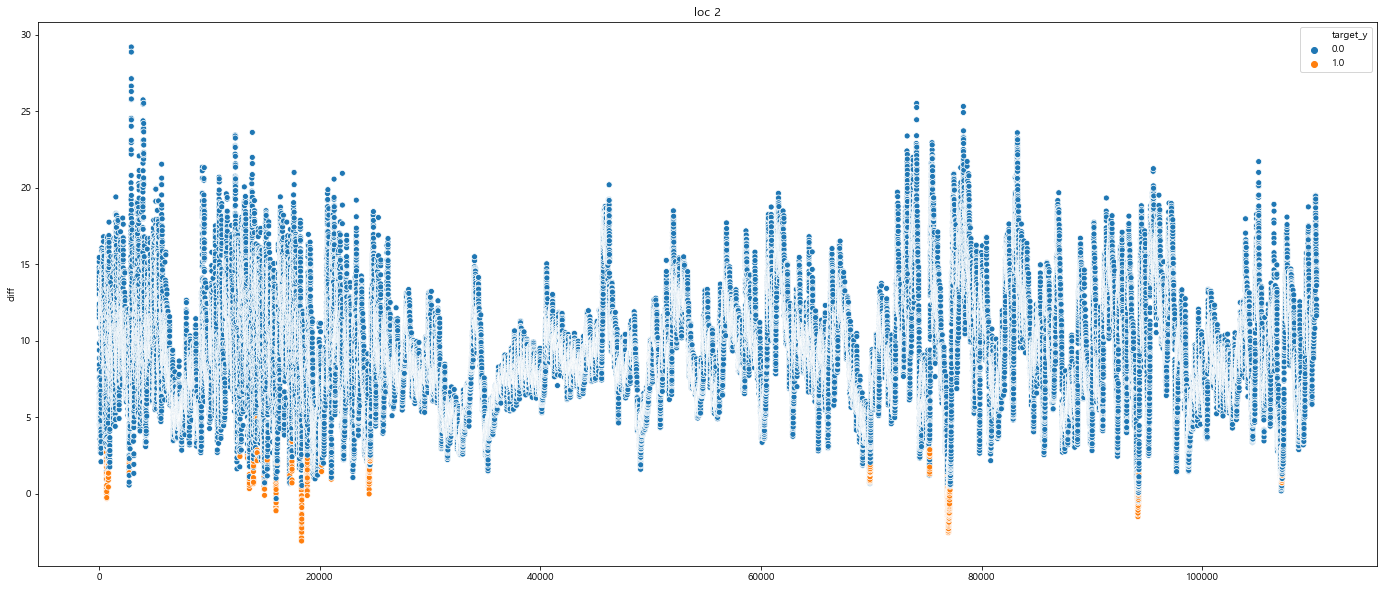

In [173]:
plt.figure(figsize=(24,10))
sns.scatterplot(x=range(len(pred_y_loc2)) , y='diff', hue='target_y', data=pred_y_loc2)
plt.title('loc 2')

Text(0.5, 1.0, 'loc 3')

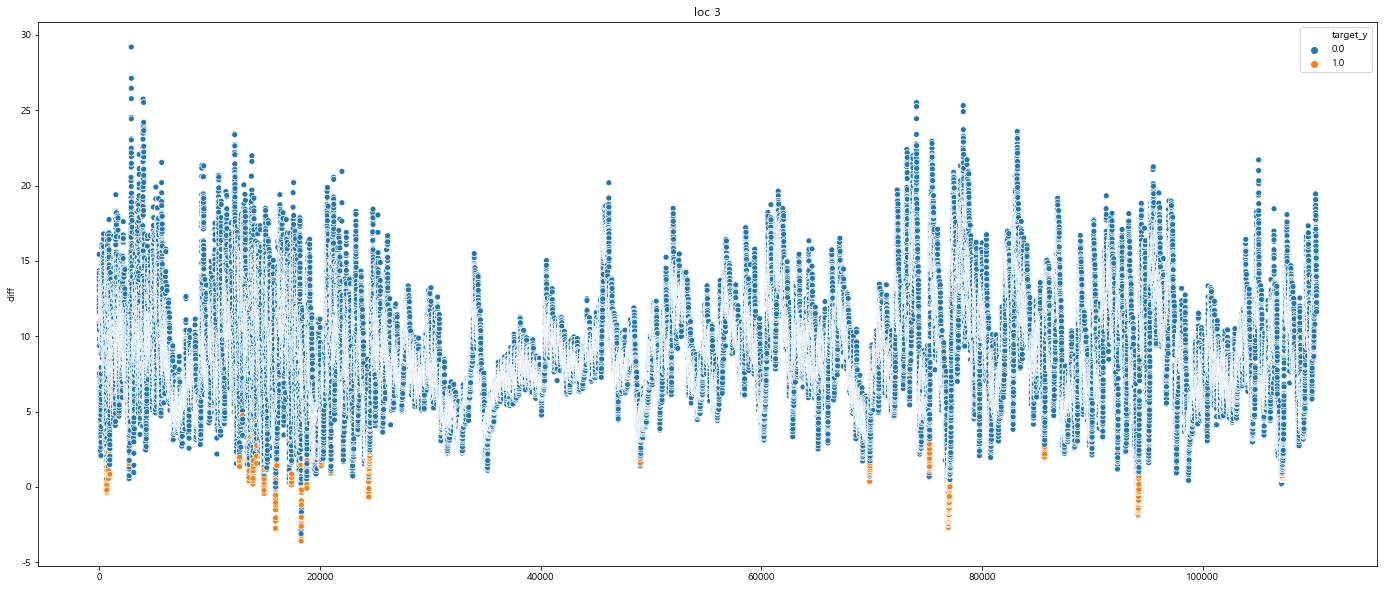

In [174]:
plt.figure(figsize=(24,10))
sns.scatterplot(x=range(len(pred_y_loc3)) , y='diff', hue='target_y', data=pred_y_loc3)
plt.title('loc 3')

In [232]:
# model.save('24h(2.365).h5')

## 48h 모델

In [130]:
x = plant_48.iloc[:,[1,2,3,4,5,7,8]]
y = plant_48.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

print(train_x.shape)  # (240931, 7)
print(train_y.shape)  # (240931, 5)

(240931, 7)
(240931, 5)


In [135]:
# callback 함수
es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=600, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [127]:
model.evaluate(test_x, test_y, batch_size=4096)

103257/103257 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 4us/step


[18.71859766072211, 2.4824700355529785]

In [ ]:
# model.save('48h(2.47).h5')

In [100]:


train_x = plant_48.loc['2017-02':'2019',['temp_in','hum_in','temp_coil','temp_out','hum_out','temp_24','hum_24']]
train_y = plant_48.loc['2017-02':'2019',['temp_in_y','hum_in_y','temp_coil_y','temp_out_y','hum_out_y']]

In [102]:
plant_48.today.astype('datetime64')

today  temp_in  hum_in  temp_coil  temp_out  hum_out  \
0       2016-04-01 00:00:00    16.00   24.00      11.00      9.00    42.00   
1       2016-04-01 00:00:00    14.00   23.00      11.00      9.00    42.00   
2       2016-04-01 00:00:00    13.00   32.00      10.00      9.00    42.00   
3       2016-04-01 03:00:00    14.00   28.00      10.00      7.00    59.00   
4       2016-04-01 03:00:00    12.00   32.00       9.00      7.00    59.00   
...                     ...      ...     ...        ...       ...      ...   
344183  2019-03-29 23:40:00    11.10   49.63      10.71      7.04    70.94   
344184  2019-03-29 23:40:00    11.10   49.63      10.71      7.04    70.94   
344185  2019-03-29 23:50:00    13.17   48.41      12.66      8.11    60.20   
344186  2019-03-29 23:50:00    12.11   49.79      11.97      8.11    60.20   
344187  2019-03-29 23:50:00    11.37   51.98      11.36      8.11    60.20   

        target    temp_24     hum_24         datetime_24  ... temp_in_y  \
0          0.0  13.200000  60.000000 2016-04-03 00:00:00  ...     17.00   
1          0.0  13.200000  60.000000 2016-04-03 00:00:00  ...     16.00   
2          0.0  13.200000  60.000000 2016-04-03 00:00:00  ...     15.00   
3          0.0  11.300000  71.000000 2016-04-03 03:00:00  ...     16.00   
4          0.0  11.300000  71.000000 2016-04-03 03:00:00  ...     14.00   
...        ...        ...        ...                 ...  ...       ...   
344183     0.0   3.333333  52.777778 2019-03-31 23:40:00  ...      8.99   
344184     0.0   3.333333  52.777778 2019-03-31 23:40:00  ...      8.99   
344185     0.0   3.166667  53.888889 2019-03-31 23:50:00  ...     10.49   
344186     0.0   3.166667  53.888889 2019-03-31 23:50:00  ...     10.55   
344187     0.0   3.166667  53.888889 2019-03-31 23:50:00  ...      9.82   

        hum_in_y  temp_coil_y  temp_out_y  hum_out_y  target_y  loc  plant  \
0          54.00        14.00       12.00      70.00       0.0    1      1   
1          51.00        13.00       12.00      70.00       0.0    2      1   
2          62.00        12.00       12.00      70.00       0.0    3      1   
3          58.00        12.00       10.00      81.00       0.0    1      1   
4          65.00        11.00       10.00      81.00       0.0    2      1   
...          ...          ...         ...        ...       ...  ...    ...   
344183     37.33         9.15        4.47      53.14       0.0    1      2   
344184     37.33         9.15        4.47      53.14       0.0    3      2   
344185     38.74        10.52        6.34      45.94       0.0    1      1   
344186     36.69        11.01        6.34      45.94       0.0    2      1   
344187     39.35         9.83        6.34      45.94       0.0    3      1   

        month  day  
0           4    3  
1           4    3  
2           4    3  
3           4    3  
4           4    3  
...       ...  ...  
344183      3   31  
344184      3   31  
344185      3   31  
344186      3   31  
344187      3   31  

[344188 rows x 21 columns]

# 공장환경 예측모델 load

In [20]:
# 모델 load
model_24 = load_model('24h(2.371).h5')
model_48 = load_model('48h(2.47).h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# 환경예측 > 결로예측 > 검증

In [26]:
test_x = pd.read_csv('test_x.csv', index_col=0)
test_y = pd.read_csv('test_y.csv', index_col=0)

pred_y = model_24.predict(test_x)
pred_y

array([[23.685446, 58.312195, 22.406246, 19.620995, 68.765045],
       [20.377243, 35.535065, 17.253368, 17.960957, 39.07785 ],
       [11.258762, 41.22969 , 10.274924,  7.054474, 52.537746],
       ...,
       [27.705986, 63.055935, 29.97201 , 24.802002, 76.83323 ],
       [10.615252, 41.60607 ,  9.515888,  8.400966, 40.332554],
       [ 6.498707, 57.854336,  3.233567,  3.623381, 66.817795]],
      dtype=float32)

In [27]:
label = pd.DataFrame(np.array(plant_24.iloc[test_y.index,16:]))
pred_y = pd.DataFrame(pred_y)

#['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']


res = pd.concat([pred_y, label], axis=1)
res.columns = ['temp_in', 'hum_in', 'temp_coil', 'temp_out','hum_out','target','loc','plant','month','day']
res_target = res[['target']]
res = res[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil']]
res['dewpoint'] = dewpoint(res['temp_in'], res['hum_in'])
res['diff'] = res['temp_in'] - res['temp_coil']
res['dew_diff'] = np.where(
    res['dewpoint']>res['temp_coil'],
    np.where(res['dewpoint']<res['temp_in'],
             1,0),0)
# res['low_1'] = np.where(res['temp_coil'] - res['dewpoint'] >= 1,0,1)
res['low_1'] = res['temp_coil'] - res['dewpoint']

res = res[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']]

pred_y_proba = tree_model.predict_proba(res)
pred_y_proba

pred_y = tree_model.predict(res)
pred_y

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
print(classification_report(res_target, pred_y))
print(confusion_matrix(res_target, pred_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.63      0.68      0.65       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102862    219]
 [   180    377]]


In [29]:
for i in range(40,50,1) :
    print('\n\n',i/100)
    print(classification_report(res_target, np.where(pred_y_proba[:,1]>i/100,1,0)))
    print(confusion_matrix(res_target, np.where(pred_y_proba[:,1]>i/100,1,0)))



 0.1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.59      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102812    269]
 [   173    384]]


 0.11
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.59      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102812    269]
 [   174    383]]


 0.12
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.59      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84  

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.60      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102834    247]
 [   179    378]]


 0.34
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.61      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102836    245]
 [   179    378]]


 0.35
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.61      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.8

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.64      0.68      0.66       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102874    207]
 [   181    376]]


 0.57
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.65      0.68      0.66       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102878    203]
 [   181    376]]


 0.58
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.66      0.68      0.67       557

    accuracy                           1.00    103638
   macro avg       0.83      0.84      0.8

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.73      0.64      0.68       557

    accuracy                           1.00    103638
   macro avg       0.87      0.82      0.84    103638
weighted avg       1.00      1.00      1.00    103638

[[102953    128]
 [   202    355]]


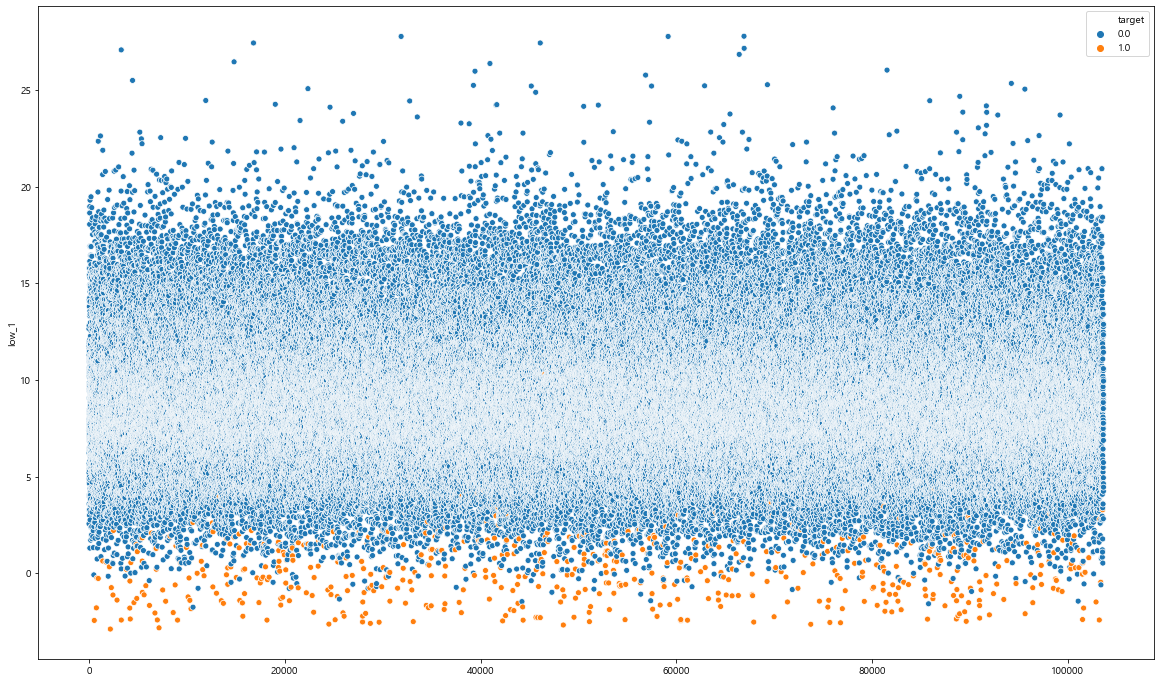

In [38]:
plt.figure(figsize=(20,12))
sns.scatterplot(range(len(res)),res.iloc[:,-1], hue=res_target['target'])


# ROC curve

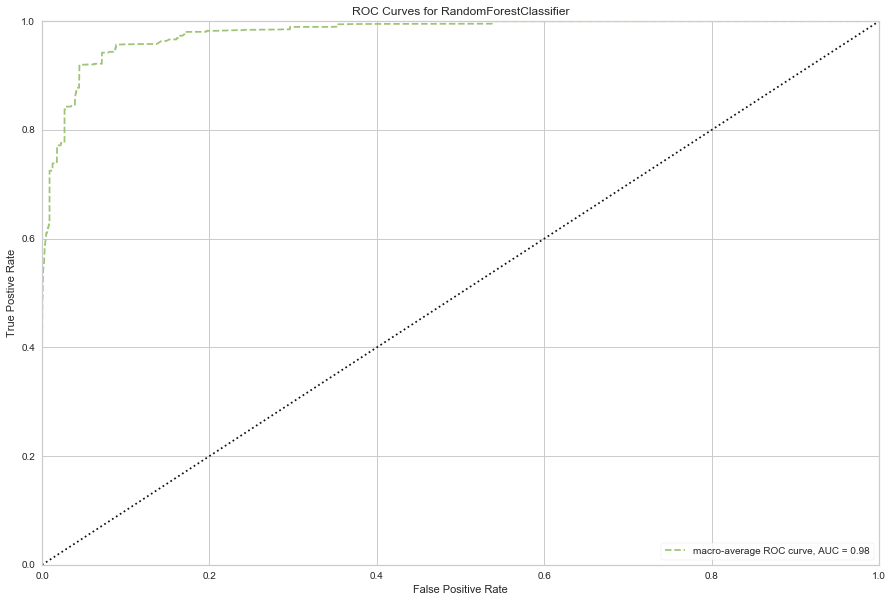

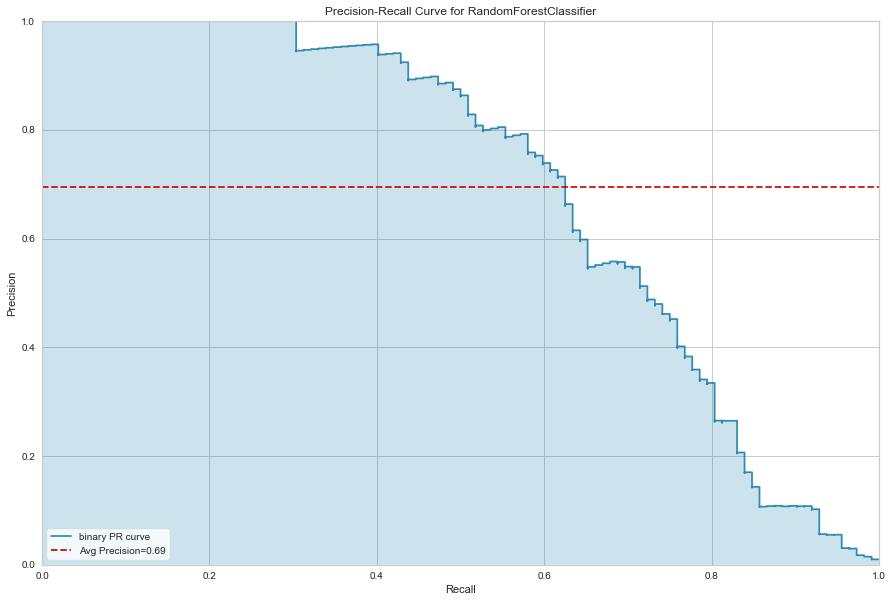

In [39]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(15,10))

X_train, X_test, y_train, y_test = train_test_split(res, res_target, test_size=0.20,
                                                    random_state=42)

visualizer = ROCAUC(tree_model, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


from yellowbrick.classifier import PrecisionRecallCurve

plt.figure(figsize=(15,10))

viz = PrecisionRecallCurve(tree_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# 환경예측 > 결로예측 > 검증

In [26]:
test_x = pd.read_csv('test_x.csv', index_col=0)
test_y = pd.read_csv('test_y.csv', index_col=0)

pred_y = model_24.predict(test_x)
pred_y

array([[23.685446, 58.312195, 22.406246, 19.620995, 68.765045],
       [20.377243, 35.535065, 17.253368, 17.960957, 39.07785 ],
       [11.258762, 41.22969 , 10.274924,  7.054474, 52.537746],
       ...,
       [27.705986, 63.055935, 29.97201 , 24.802002, 76.83323 ],
       [10.615252, 41.60607 ,  9.515888,  8.400966, 40.332554],
       [ 6.498707, 57.854336,  3.233567,  3.623381, 66.817795]],
      dtype=float32)

In [27]:
label = pd.DataFrame(np.array(plant_24.iloc[test_y.index,16:]))
pred_y = pd.DataFrame(pred_y)

#['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']


res = pd.concat([pred_y, label], axis=1)
res.columns = ['temp_in', 'hum_in', 'temp_coil', 'temp_out','hum_out','target','loc','plant','month','day']
res_target = res[['target']]
res = res[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil']]
res['dewpoint'] = dewpoint(res['temp_in'], res['hum_in'])
res['diff'] = res['temp_in'] - res['temp_coil']
res['dew_diff'] = np.where(
    res['dewpoint']>res['temp_coil'],
    np.where(res['dewpoint']<res['temp_in'],
             1,0),0)
# res['low_1'] = np.where(res['temp_coil'] - res['dewpoint'] >= 1,0,1)
res['low_1'] = res['temp_coil'] - res['dewpoint']

res = res[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']]

pred_y_proba = tree_model.predict_proba(res)
pred_y_proba

pred_y = tree_model.predict(res)
pred_y

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
print(classification_report(res_target, pred_y))
print(confusion_matrix(res_target, pred_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.63      0.68      0.65       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102862    219]
 [   180    377]]


In [29]:
for i in range(40,50,1) :
    print('\n\n',i/100)
    print(classification_report(res_target, np.where(pred_y_proba[:,1]>i/100,1,0)))
    print(confusion_matrix(res_target, np.where(pred_y_proba[:,1]>i/100,1,0)))



 0.1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.59      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102812    269]
 [   173    384]]


 0.11
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.59      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102812    269]
 [   174    383]]


 0.12
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.59      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84  

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.60      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102834    247]
 [   179    378]]


 0.34
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.61      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102836    245]
 [   179    378]]


 0.35
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.61      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.8

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.64      0.68      0.66       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102874    207]
 [   181    376]]


 0.57
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.65      0.68      0.66       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102878    203]
 [   181    376]]


 0.58
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.66      0.68      0.67       557

    accuracy                           1.00    103638
   macro avg       0.83      0.84      0.8

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.73      0.64      0.68       557

    accuracy                           1.00    103638
   macro avg       0.87      0.82      0.84    103638
weighted avg       1.00      1.00      1.00    103638

[[102953    128]
 [   202    355]]


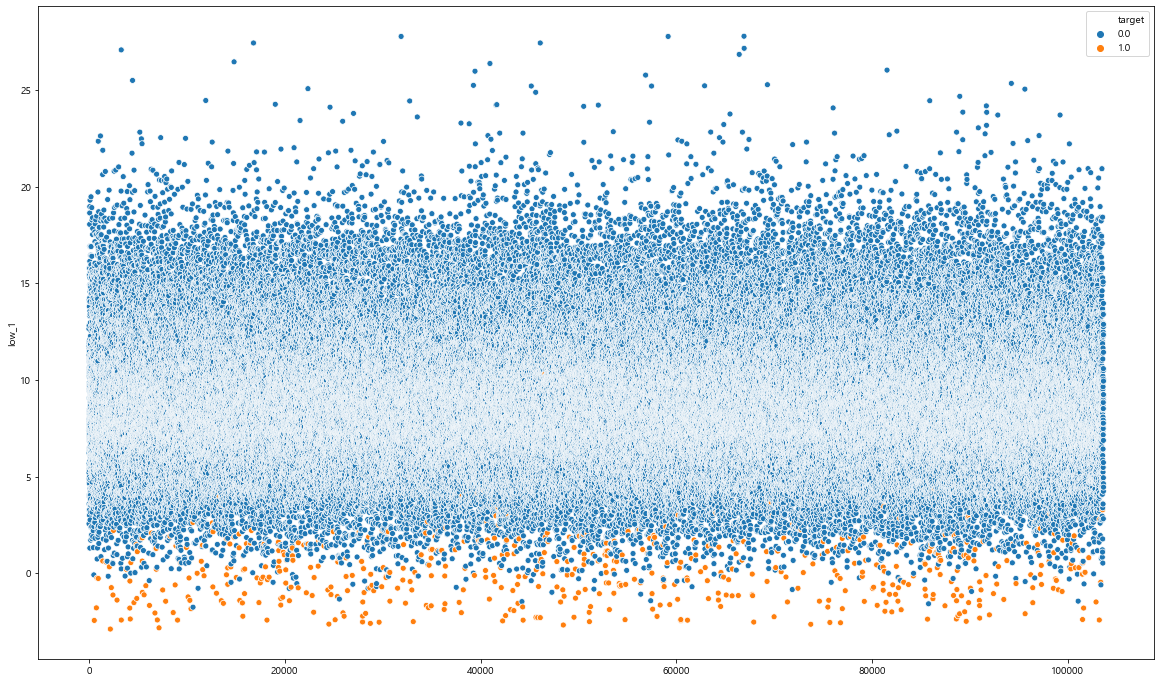

In [38]:
plt.figure(figsize=(20,12))
sns.scatterplot(range(len(res)),res.iloc[:,-1], hue=res_target['target'])


# ROC curve

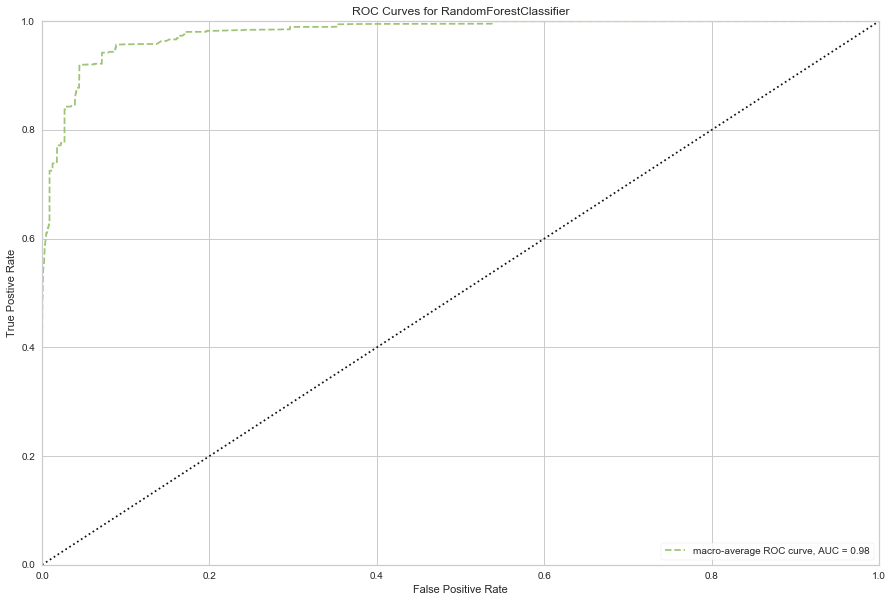

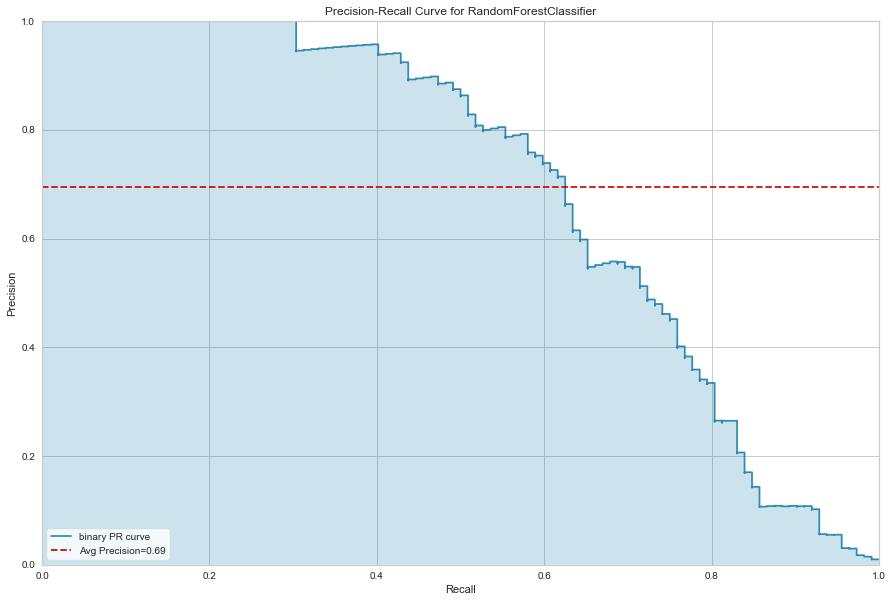

In [39]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(15,10))

X_train, X_test, y_train, y_test = train_test_split(res, res_target, test_size=0.20,
                                                    random_state=42)

visualizer = ROCAUC(tree_model, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


from yellowbrick.classifier import PrecisionRecallCurve

plt.figure(figsize=(15,10))

viz = PrecisionRecallCurve(tree_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# 결로 예측 모델

In [21]:
condensation_data = plant_24.iloc[:,[1,2,3,4,5,6,7,16,17,18,19,20]]

condensation_data = condensation_data.reset_index(drop=True)
condensation_data = condensation_data[['month','day','plant','loc','temp_in','hum_in','temp_coil','target',]]

# condensation_data.to_csv('condensation_data.csv')

condensation_data['dewpoint'] = dewpoint(condensation_data['temp_in'], condensation_data['hum_in'])
condensation_data['diff'] = condensation_data['temp_in'] - condensation_data['temp_coil']

condensation_data['dew_diff'] = np.where(
    condensation_data['dewpoint']>condensation_data['temp_coil'],
    np.where(condensation_data['dewpoint']<condensation_data['temp_in'],
             1,0),0)

# condensation_data['low_1'] = np.where(condensation_data['temp_coil'] - condensation_data['dewpoint'] >= 1,0,1)
condensation_data['low_1'] = condensation_data['temp_coil'] - condensation_data['dewpoint']

condensation_data = condensation_data.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,7]]

# 전체 데이터셋 x,y 분리
condensation_data_x = condensation_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
condensation_data_y = condensation_data.iloc[:,[11]]

# 결로 1 값이 모두 들어간 데이터 샘플 
nag = condensation_data[condensation_data['target'] == 1]  # 1977
pos_index = random.sample(list(condensation_data[condensation_data['target'] == 0].index), 14023)
pos = condensation_data.iloc[pos_index, :]
condensation_sample = pd.concat([nag,pos])

# 셔플
condensation_sample = condensation_sample.sample(frac=1).reset_index(drop=True)

# x, y 분리
condensation_sample_x = condensation_sample.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
condensation_sample_y = condensation_sample.iloc[:,[11]]

In [22]:
# 전체 데이터셋 분리
# 정규화
# scaler = MinMaxScaler()
# condensation_data_x.iloc[:,4:] = scaler.fit_transform(condensation_data_x.iloc[:,4:])

# 훈련셋, 검증셋
train_x, test_x, train_y, test_y = train_test_split(condensation_data_x, condensation_data_y, test_size=0.3, random_state=77)  

In [45]:
# 샘플링한 데이터셋 분리
# 정규화
# scaler = MinMaxScaler()
# condensation_sample_x.iloc[:,4:] = scaler.fit_transform(condensation_sample_x.iloc[:,4:])

# 훈련셋, 검증셋
train_x, test_x, train_y, test_y = train_test_split(condensation_sample_x, condensation_sample_y, test_size=0.3, random_state=77)  

In [142]:
# callback 함수

es = EarlyStopping(patience=50)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=32, activation='linear', input_dim=10))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=210, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

# 검증 
pred_y = model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      4203
         1.0       1.00      0.01      0.01       597

    accuracy                           0.88      4800
   macro avg       0.94      0.50      0.47      4800
weighted avg       0.89      0.88      0.82      4800

[[4203    0]
 [ 593    4]]


# 의사결정트리 모델

In [23]:
import mglearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree_model = DecisionTreeClassifier(random_state=777, max_depth=6)
tree_model.fit(train_x, train_y)
    
print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_x, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))

# 검증
print('\n학습 데이터 test셋\n')
pred_y = tree_model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model.predict(condensation_data_x).reshape(-1,).astype('int')
test__y = np.array(condensation_data_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000
특성 중요도:
[7.06247819e-04 1.22285210e-03 3.49463544e-02 7.20333534e-02
 4.37057990e-03 3.49250820e-03 1.73616118e-03 5.35202350e-03
 6.93972945e-03 0.00000000e+00 8.69200190e-01]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']

학습 데이터 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.98      0.95      0.97       608

    accuracy                           1.00    103638
   macro avg       0.99      0.98      0.98    103638
weighted avg       1.00      1.00      1.00    103638

[[103019     11]
 [    28    580]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    343480
         1.0       0.98      0.97      0.98      1977

    accuracy                           1.00    345457
   macro avg       0.99      0.99      0.99    345457
weighted avg       1.

# 랜덤포레스트 모델

In [13]:
tree_model = RandomForestClassifier(n_estimators=70, max_leaf_nodes=32, random_state=777)
tree_model.fit(train_x, train_y)

print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_x, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))
print('\n\n')

# 검증
print('\n학습 데이터의 test셋\n')
pred_y = tree_model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model.predict(condensation_data_x).reshape(-1,).astype('int')
test__y = np.array(condensation_data_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000
특성 중요도:
[0.00411237 0.00404231 0.02774733 0.03283623 0.00739359 0.12895855
 0.01089487 0.01619542 0.03038057 0.15440013 0.58303862]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']




학습 데이터의 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.98      0.95      0.97       608

    accuracy                           1.00    103638
   macro avg       0.99      0.98      0.98    103638
weighted avg       1.00      1.00      1.00    103638

[[103019     11]
 [    28    580]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    343480
         1.0       0.99      0.96      0.97      1977

    accuracy                           1.00    345457
   macro avg       0.99      0.98      0.99    345457
weighted avg       1.00      1.00      1.00    345457

[[34345

# 에측 모델로 만든 데이터로 결로 학습

In [46]:
pred_24 = model_24.predict(plant_24.iloc[:,[1,2,3,4,5,7,8]])
pred_24 = pd.concat([plant_24.iloc[:, [19,20,18,17]], pd.DataFrame(pred_24[:,:3]), plant_24.iloc[:,[6]] ], axis=1)

pred_48 = model_48.predict(plant_48.iloc[:,[1,2,3,4,5,7,8]])
pred_48 = pd.concat([plant_24.iloc[:, [19,20,18,17]], pd.DataFrame(pred_48[:,:3]), plant_24.iloc[:,[6]] ], axis=1)

pred_48 = pred_48.dropna(how='any')

In [47]:
pred_24.columns = ['month','day','plant','loc','temp_in','hum_in','temp_coil','target']

# condensation_data.to_csv('condensation_data.csv')

pred_24['dewpoint'] = dewpoint(pred_24['temp_in'], pred_24['hum_in'])
pred_24['diff'] = pred_24['temp_in'] - pred_24['temp_coil']

pred_24['dew_diff'] = np.where(
    pred_24['dewpoint']>pred_24['temp_coil'],
    np.where(pred_24['dewpoint']<pred_24['temp_in'],
             1,0),0)

# condensation_data['low_1'] = np.where(condensation_data['temp_coil'] - condensation_data['dewpoint'] >= 1,0,1)
pred_24['low_1'] = pred_24['temp_coil'] - pred_24['dewpoint']
pred_24



pred_48.columns = ['month','day','plant','loc','temp_in','hum_in','temp_coil','target']

# condensation_data.to_csv('condensation_data.csv')

pred_48['dewpoint'] = dewpoint(pred_48['temp_in'], pred_48['hum_in'])
pred_48['diff'] = pred_48['temp_in'] - pred_48['temp_coil']

pred_48['dew_diff'] = np.where(
    pred_48['dewpoint']>pred_48['temp_coil'],
    np.where(pred_48['dewpoint']<pred_48['temp_in'],
             1,0),0)

# condensation_data['low_1'] = np.where(condensation_data['temp_coil'] - condensation_data['dewpoint'] >= 1,0,1)
pred_48['low_1'] = pred_48['temp_coil'] - pred_48['dewpoint']
pred_48

month  day  plant  loc    temp_in     hum_in  temp_coil  target  \
0           4    2      1    1  14.526598  53.049530  11.595003     0.0   
1           4    2      1    3  13.644583  53.364082  10.552067     0.0   
2           4    2      1    2  14.003632  46.330139  10.880863     0.0   
3           4    2      1    2  12.704655  57.272827  10.294663     0.0   
4           4    2      1    3  11.500134  62.232929   8.921490     0.0   
...       ...  ...    ...  ...        ...        ...        ...     ...   
344183      3   30      1    1  10.710859  29.625275  10.484863     0.0   
344184      3   30      2    1  10.710859  29.625275  10.484863     0.0   
344185      3   30      1    2  10.599865  31.178535  10.764764     0.0   
344186      3   30      1    1   9.828398  34.617176  10.021920     0.0   
344187      3   30      2    1   9.496077  35.824387   9.485801     0.0   

        dewpoint      diff  dew_diff      low_1  
0       5.063743  2.931595         0   6.531260  
1       4.329699  3.092516         0   6.222368  
2       2.653775  3.122768         0   8.227088  
3       4.464003  2.409991         0   5.830660  
4       4.519009  2.578644         0   4.402481  
...          ...       ...       ...        ...  
344183 -6.356258  0.225996         0  16.841122  
344184 -6.356258  0.225996         0  16.841122  
344185 -5.782771 -0.164899         0  16.547535  
344186 -5.082135 -0.193522         0  15.104055  
344187 -4.923302  0.010276         0  14.409103  

[344188 rows x 12 columns]

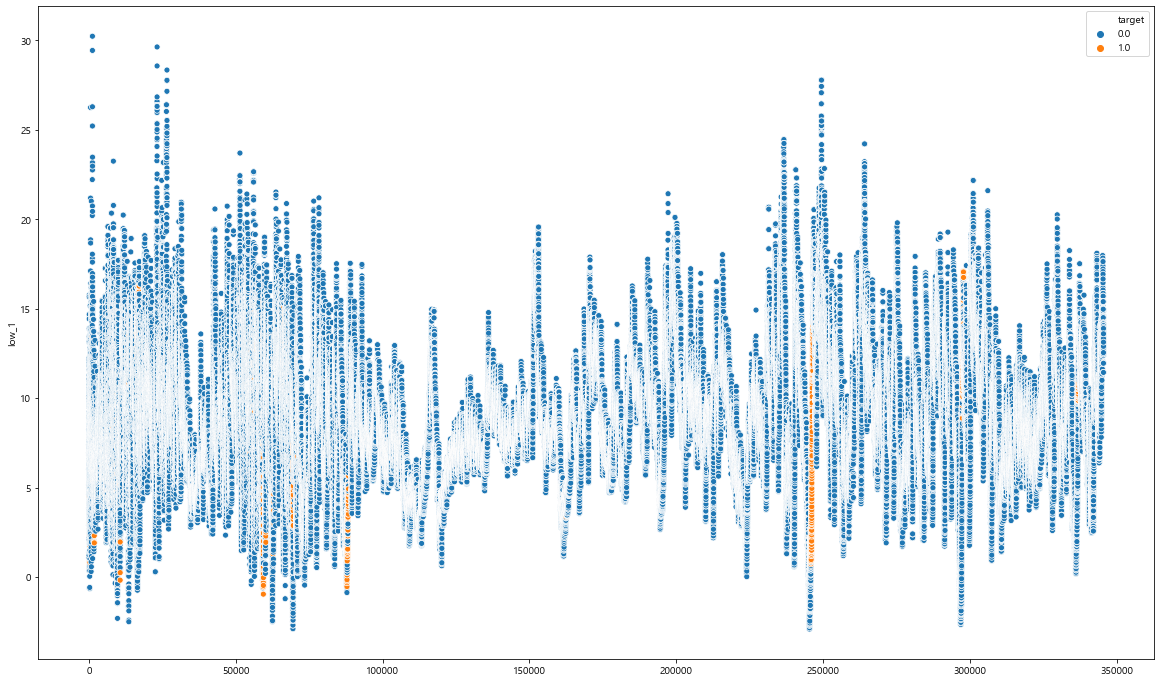

In [113]:
plt.figure(figsize=(20,12))
sns.scatterplot(range(len(pred_24_x)),pred_24_x.iloc[:,-1], hue=pred_24_y['target'])

In [80]:
pred_24_x = pred_24.iloc[:,[0,1,2,3,4,5,6,8,9,10,11]]
pred_24_y = pred_24.iloc[:,[7]]

pred_48_x = pred_48.iloc[:,[0,1,2,3,4,5,6,8,9,10,11]]
pred_48_y = pred_48.iloc[:,[7]]

train_x_24, test_x_24, train_y_24, test_y_24 = train_test_split(pred_24_x, pred_24_y, test_size=0.3, random_state=777)
train_x_48, test_x_48, train_y_48, test_y_48 = train_test_split(pred_48_x, pred_48_y, test_size=0.3, random_state=777)

In [91]:
tree_model_24 = RandomForestClassifier().fit(train_x_24, train_y_24)

pred_y_24 = tree_model_24.predict(test_x_24)
pred_y_24

tree_model_48 = RandomForestClassifier().fit(train_x_48, train_y_48)

pred_y_48 = tree_model_48.predict(test_x_48)
pred_y_48

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
print("훈련 세트 정확도: {:.3f}".format(tree_model_24.score(train_x_24, train_y_24)))
print("테스트 세트 정확도: {:.3f}".format(tree_model_24.score(test_x_24, test_y_24)))
print("특성 중요도:\n{}".format(tree_model_24.feature_importances_))
print(list(pred_24_x.columns))
print('\n\n')

# 검증
print('\n학습 데이터의 test셋\n')
pred_y = tree_model_24.predict(test_x_24).reshape(-1,).astype('int')
test_y = np.array(test_y_24).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model_24.predict(pred_24_x).reshape(-1,).astype('int')
test__y = np.array(pred_24_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.998
특성 중요도:
[0.05600574 0.13682029 0.03603611 0.06568164 0.11912802 0.10891598
 0.1452313  0.11940176 0.10909839 0.00093554 0.10274524]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']




학습 데이터의 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103071
         1.0       0.87      0.68      0.77       567

    accuracy                           1.00    103638
   macro avg       0.93      0.84      0.88    103638
weighted avg       1.00      1.00      1.00    103638

[[103014     57]
 [   180    387]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    343480
         1.0       0.97      0.91      0.94      1977

    accuracy                           1.00    345457
   macro avg       0.98      0.95      0.97    345457
weighted avg       1.00      1.00      1.00    345457

[[34342

In [94]:
print("훈련 세트 정확도: {:.3f}".format(tree_model_48.score(train_x_48, train_y_48)))
print("테스트 세트 정확도: {:.3f}".format(tree_model_48.score(test_x_48, test_y_48)))
print("특성 중요도:\n{}".format(tree_model_48.feature_importances_))
print(list(pred_48_x.columns))
print('\n\n')

# 검증
print('\n학습 데이터의 test셋\n')
pred_y = tree_model_48.predict(train_x_48).reshape(-1,).astype('int')
test_y = np.array(train_y_48).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model_48.predict(pred_48_x).reshape(-1,).astype('int')
test__y = np.array(pred_48_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.997
특성 중요도:
[5.02330942e-02 1.36811768e-01 4.40690820e-02 5.05202305e-02
 1.18748293e-01 1.04617534e-01 1.36542372e-01 1.19662306e-01
 1.33801437e-01 5.20411540e-06 1.04988678e-01]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']




학습 데이터의 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    239524
         1.0       1.00      1.00      1.00      1407

    accuracy                           1.00    240931
   macro avg       1.00      1.00      1.00    240931
weighted avg       1.00      1.00      1.00    240931

[[239522      2]
 [     6   1401]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    342211
         1.0       0.97      0.85      0.91      1977

    accuracy                           1.00    344188
   macro avg       0.98      0.93      0.95    344188
weighted avg     

# PCA 이용 랜덤포레스트

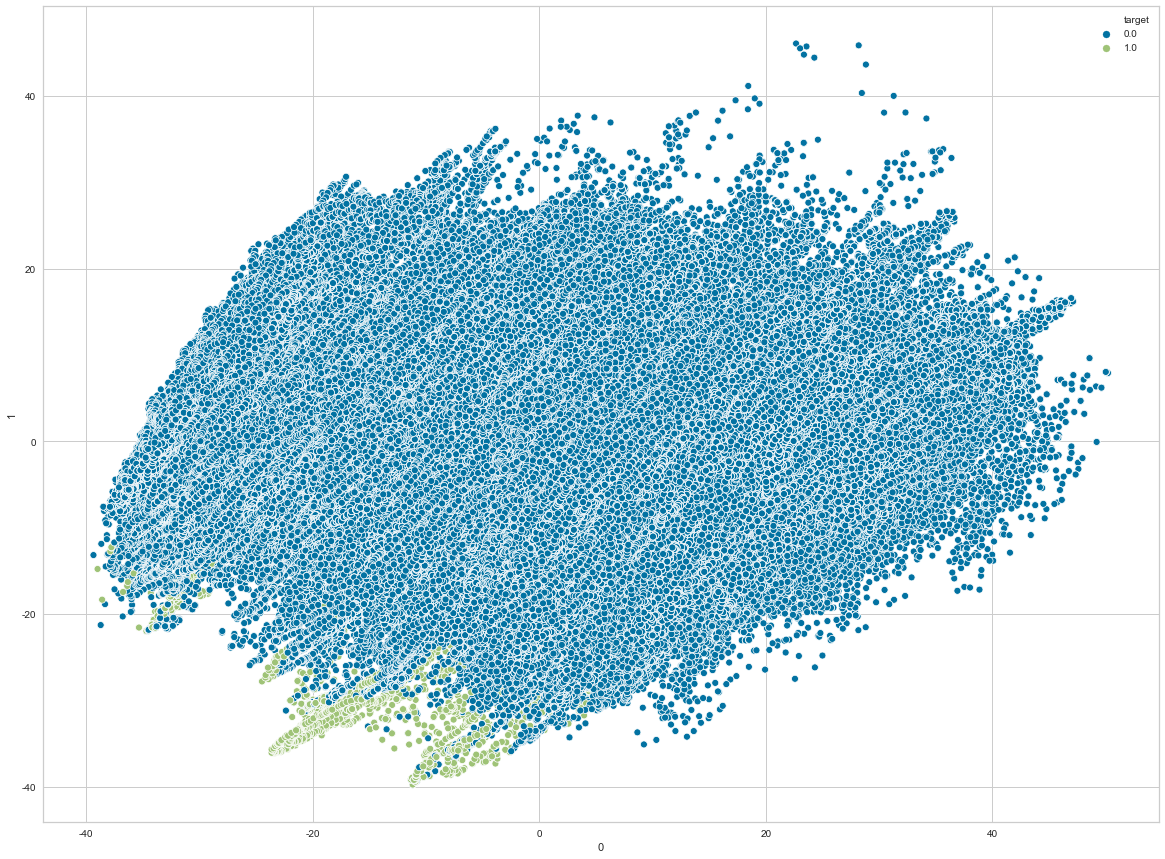

In [41]:
plt.figure(figsize=(20,15))

pca = PCA(n_components = 2)
train_X2D = pca.fit_transform(condensation_data_x)
pca_df = pd.concat([pd.DataFrame(train_X2D), condensation_data_y], axis=1)

sns.scatterplot(data=pca_df, x=0, y=1, hue='target')

In [46]:
pca = PCA(n_components = 2)
train_X2D = pca.fit_transform(train_x.iloc[:,4:])
train_X2D
test_X2D = pca.fit_transform(test_x.iloc[:,4:])
test_X2D

tree_model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=7)
tree_model.fit(train_X2D, train_y)

print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_X2D, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_X2D, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))
print('\n\n')

pred_y = tree_model.predict(test_X2D).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.963
특성 중요도:
[0.22006821 0.77993179]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']



              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4166
         1.0       0.94      0.78      0.85       634

    accuracy                           0.96      4800
   macro avg       0.95      0.88      0.91      4800
weighted avg       0.96      0.96      0.96      4800

[[4132   34]
 [ 142  492]]


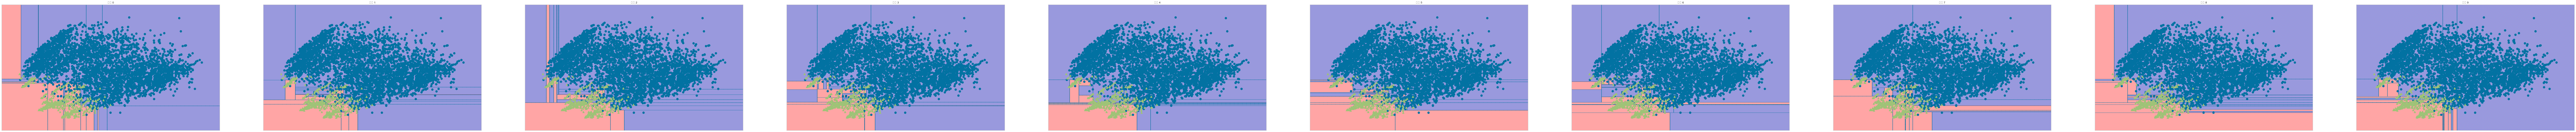

In [47]:
fig, axes = plt.subplots(1, 10, figsize=(200, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), tree_model.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(test_X2D, test_y, tree, ax=ax)

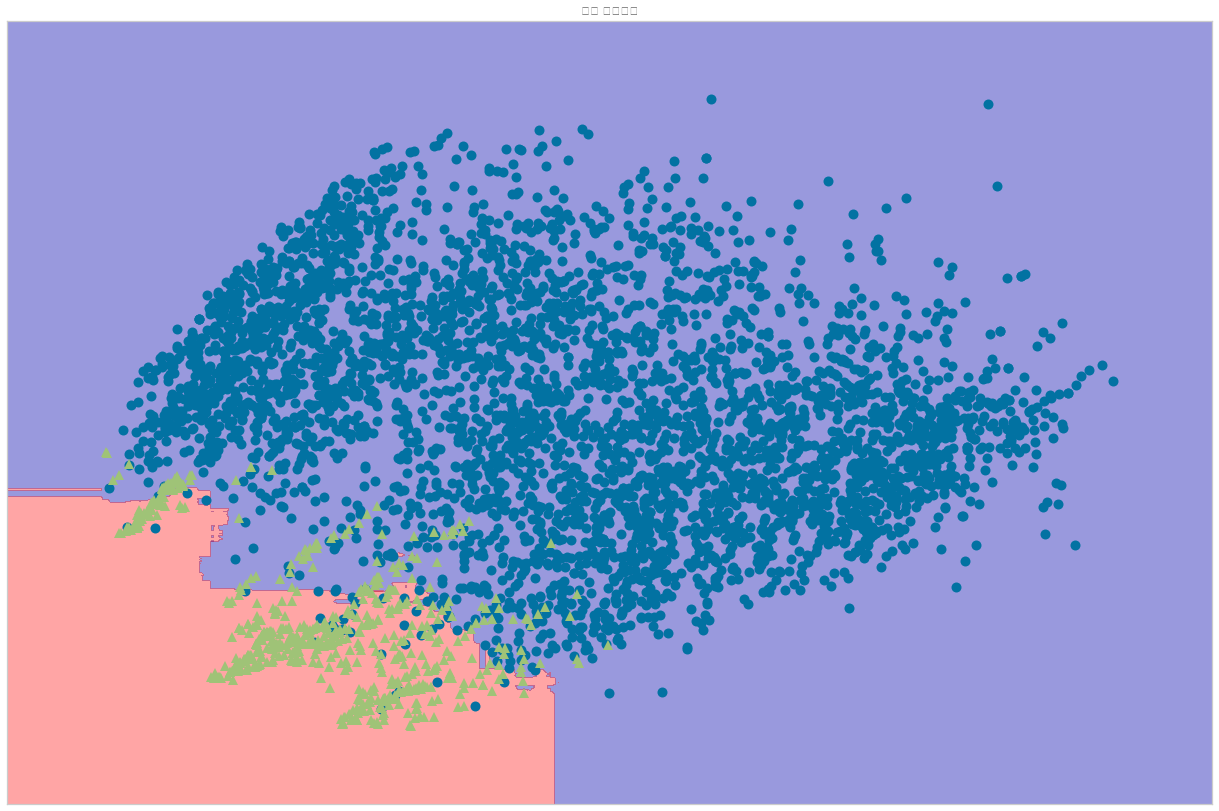

In [48]:
plt.figure(figsize=(10.80*2,7.20*2))
mglearn.plots.plot_2d_separator(tree_model, test_X2D, fill=True, alpha=.4)
plt.title("랜덤 포레스트")
mglearn.discrete_scatter(test_X2D[:, 0], test_X2D[:, 1], test_y)

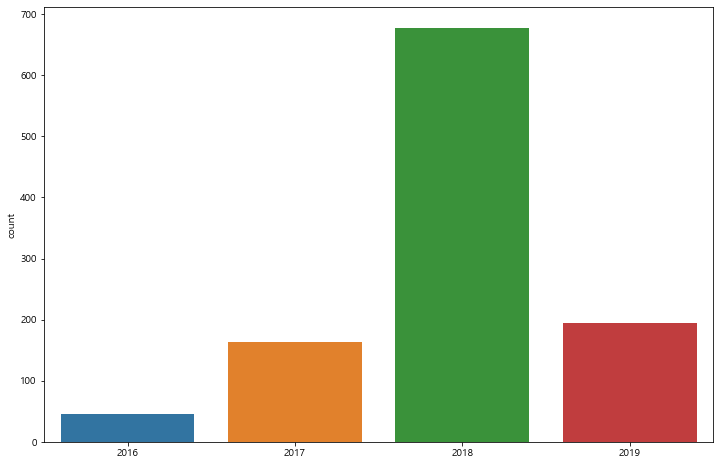

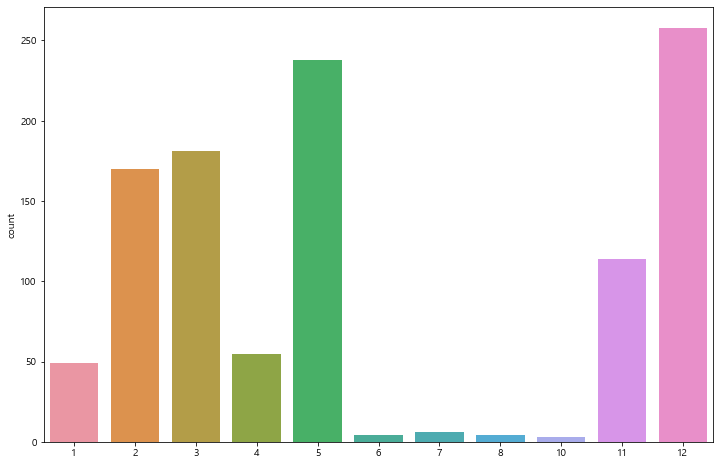

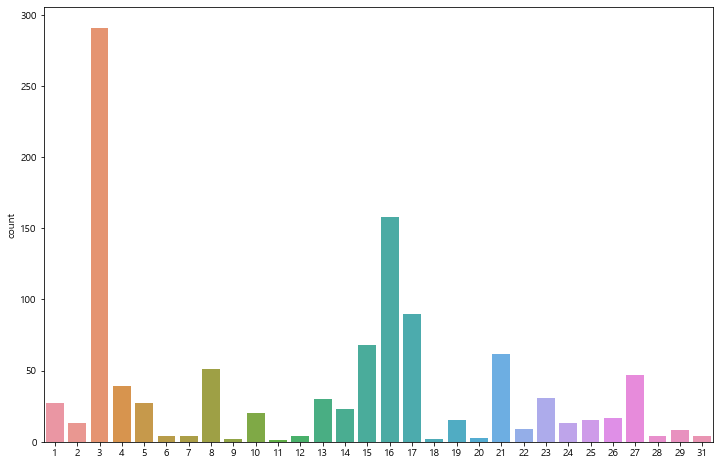

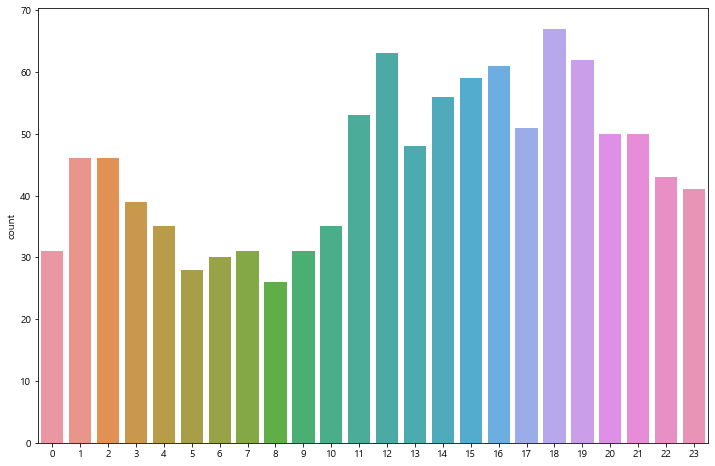

In [122]:
error = condensation_data[condensation_data['dewpoint'] < condensation_data['temp_coil']]
error = error[error['target'] == 1]

error = plant_24.iloc[error.index,:]
error['today'] = error['today'].astype('datetime64')

years = []
months = []
days = []
hours = []
for i in error['today'] :
    hours.append(i.hour)
    months.append(i.month)
    days.append(i.day)
    years.append(i.year)
    
plt.figure(figsize=(12,8))
sns.countplot(years)
# plt.savefig('year.png')

plt.figure(figsize=(12,8))
sns.countplot(months)
# plt.savefig('month.png')

plt.figure(figsize=(12,8))
sns.countplot(days)
# plt.savefig('day.png')

plt.figure(figsize=(12,8))
sns.countplot(hours)
# plt.savefig('hour.png')

# 검증

In [100]:
test = pd.read_csv('test.csv', index_col=0)

test['plant_test.mea_ddhr'] = test['plant_test.mea_ddhr'].astype('datetime64')

month = []
day = []

for i in test['plant_test.mea_ddhr'] :
    month.append(i.month)
    day.append(i.day)
    
test['month'] = month
test['day'] = day

weather_resample = pd.read_csv('weather_resample.csv').iloc[:,[0,1,2,3,4]]
weather_resample['index'] = weather_resample['index'].astype('str')

test['plant_test.mea_ddhr'] = test['plant_test.mea_ddhr'].astype('str')

In [101]:
test_merge = test.merge(weather_resample, left_on='plant_test.mea_ddhr', right_on='index', how='outer')

test_merge = test_merge.iloc[:3539, :]

In [102]:
index = test_merge.iloc[:,[12,13,1,2]]
index

index_24 = plant_24.iloc[:,[19,20,18,17]]
index_48 = plant_48.iloc[:,[19,20,18,17]]

In [103]:
test_train_24 = test_merge.iloc[:,[3,4,5,6,7,15,17]]
test_train_48 = test_merge.iloc[:,[3,4,5,6,7,16,18]]

In [104]:
test_pred_24 = model_24.predict(test_train_24)
res_24 = pd.concat([pd.DataFrame(test_pred_24),index_24], axis=1)
# res_24 = res_24.dropna(how='any')

test_pred_48 = model_48.predict(test_train_48)
res_48 = pd.concat([pd.DataFrame(test_pred_48),index_48], axis=1)
# res_48 = res_48.dropna(how='any')

In [75]:
res_24.columns = ['temp_in', 'hum_in', 'temp_coil', 'temp_out','hum_out','month','day','loc','plant']

res_24 = res_24[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil']]
res_24['dewpoint'] = dewpoint(res_24['temp_in'], res_24['hum_in'])
res_24['diff'] = res_24['temp_in'] - res_24['temp_coil']
res_24['dew_diff'] = np.where(
    res_24['dewpoint']>res_24['temp_coil'],
    np.where(res_24['dewpoint']<res_24['temp_in'],
             1,0),0)
# res['low_1'] = np.where(res['temp_coil'] - res['dewpoint'] >= 1,0,1)
res_24['low_1'] = res_24['temp_coil'] - res_24['dewpoint']

res_24 = res_24[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']]
res_24

res_48.columns = ['temp_in', 'hum_in', 'temp_coil', 'temp_out','hum_out','month','day','loc','plant']

res_48 = res_48[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil']]
res_48['dewpoint'] = dewpoint(res_48['temp_in'], res_48['hum_in'])
res_48['diff'] = res_48['temp_in'] - res_48['temp_coil']
res_48['dew_diff'] = np.where(
    res_48['dewpoint']>res_48['temp_coil'],
    np.where(res_48['dewpoint']<res_48['temp_in'],
             1,0),0)
# res['low_1'] = np.where(res['temp_coil'] - res['dewpoint'] >= 1,0,1)
res_48['low_1'] = res_48['temp_coil'] - res_48['dewpoint']

res_48 = res_48[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']]
res_48

month  day  plant  loc    temp_in     hum_in  temp_coil  dewpoint  \
0         4    3      1    1   9.068331  45.069168   8.868530 -2.233625   
1         4    3      2    1   9.314026  39.291538   9.779385 -3.856971   
2         4    3      3    1  12.700134  42.433990  10.525731  0.241988   
3         4    3      1    1  12.357237  43.951950  10.995832  0.417312   
4         4    3      2    1  12.973722  41.754860  10.093099  0.266259   
...     ...  ...    ...  ...        ...        ...        ...       ...   
3534      8   10      2    2  10.386839  57.091370  11.344705  2.247864   
3535      8   10      3    1  12.663023  49.165852  12.144682  2.260798   
3536      8   10      1    2   8.148336  58.468632   9.092279  0.479958   
3537      8   10      1    1  13.400982  40.091743  11.895456  0.089603   
3538      8   10      2    1  15.248199  30.894920  12.552932 -1.844391   

          diff  dew_diff      low_1  
0     0.199800         0  11.102155  
1    -0.465359         0  13.636355  
2     2.174403         0  10.283743  
3     1.361404         0  10.578520  
4     2.880624         0   9.826839  
...        ...       ...        ...  
3534 -0.957866         0   9.096841  
3535  0.518341         0   9.883883  
3536 -0.943943         0   8.612321  
3537  1.505526         0  11.805853  
3538  2.695268         0  14.397323  

[3539 rows x 11 columns]

In [95]:
pred_24 = tree_model_24.predict(res_24)
pred_48 = tree_model_48.predict(res_48)

pred_24_proba = tree_model_24.predict_proba(res_24)
pred_48_proba = tree_model_48.predict_proba(res_48)

In [96]:
pred_24_proba_list = []
pred_48_proba_list = []

for i, j in pred_24_proba :
    if i > j :
        pred_24_proba_list.append(round(i,2) * 100)
    else :
        pred_24_proba_list.append(round(j,2) * 100)
        
for i, j in pred_48_proba :
    if i > j :
        pred_48_proba_list.append(round(i,2) * 100)
    else :
        pred_48_proba_list.append(round(j,2) * 100)

In [97]:
test['plant_test.x24h_cond_loc'] = pred_24
test['plant_test.x24h_cond_loc_proba'] = pred_24_proba_list

test['plant_test.x48h_cond_loc'] = pred_48
test['plant_test.x48h_cond_loc_proba'] = pred_48_proba_list

test

plant_test.mea_ddhr  plant_test.plant  plant_test.loc  \
1     2019-04-01 00:00:00                 2               3   
2     2019-04-01 04:30:00                 1               2   
3     2019-04-01 10:30:00                 2               3   
4     2019-04-01 11:00:00                 1               1   
5     2019-04-01 13:30:00                 2               1   
...                   ...               ...             ...   
3535  2020-03-29 03:00:00                 1               2   
3536  2020-03-29 05:00:00                 2               3   
3537  2020-03-29 07:00:00                 2               1   
3538  2020-03-29 11:30:00                 1               1   
3539  2020-03-29 19:30:00                 1               1   

      plant_test.tem_in  plant_test.hum_in  plant_test.tem_coil  \
1                  8.17              40.42                10.10   
2                 10.03              48.81                10.79   
3                  9.45              40.93                 9.07   
4                 12.32              34.13                10.86   
5                 11.28              22.65                 8.76   
...                 ...                ...                  ...   
3535              10.73              33.36                13.30   
3536               9.15              38.86                11.70   
3537               7.10              44.87                 9.03   
3538              13.54              33.49                12.20   
3539              14.21              34.43                12.77   

      plant_test.tem_out_loc1  plant_test.hum_out_loc1 plant_test.x24h_tma  \
1                        4.20                    54.82     2019-04-02 0:00   
2                        6.09                    59.34     2019-04-02 4:30   
3                       12.26                    32.14    2019-04-02 10:30   
4                       12.32                    28.27    2019-04-02 11:00   
5                       12.01                    19.84    2019-04-02 13:30   
...                       ...                      ...                 ...   
3535                     6.28                    46.37     2020-03-30 3:00   
3536                     1.39                    74.33     2020-03-30 5:00   
3537                     4.26                    58.06     2020-03-30 7:00   
3538                    12.90                    33.67    2020-03-30 11:30   
3539                     9.88                    43.96    2020-03-30 19:30   

      plant_test.x24h_cond_loc plant_test.x48h_tma  plant_test.x48h_cond_loc  \
1                          0.0     2019-04-03 0:00                       0.0   
2                          0.0     2019-04-03 4:30                       0.0   
3                          0.0    2019-04-03 10:30                       0.0   
4                          0.0    2019-04-03 11:00                       0.0   
5                          0.0    2019-04-03 13:30                       0.0   
...                        ...                 ...                       ...   
3535                       0.0     2020-03-31 3:00                       0.0   
3536                       0.0     2020-03-31 5:00                       0.0   
3537                       0.0     2020-03-31 7:00                       0.0   
3538                       0.0    2020-03-31 11:30                       0.0   
3539                       0.0    2020-03-31 19:30                       0.0   

      month  day  plant_test.x24h_cond_loc_proba  \
1         4    1                            99.0   
2         4    1                            94.0   
3         4    1                           100.0   
4         4    1                           100.0   
5         4    1                           100.0   
...     ...  ...                             ...   
3535      3   29                           100.0   
3536      3   29                           100.0   
3537      3   29                            96.0   
3538      3   29          

In [98]:
test['plant_test.x24h_cond_loc'].value_counts()

0.0    3539
Name: plant_test.x24h_cond_loc, dtype: int64

In [99]:
test['plant_test.x48h_cond_loc'].value_counts()

0.0    3539
Name: plant_test.x48h_cond_loc, dtype: int64

In [ ]:
test_sub = test.iloc[:,[0,1,2,8,9,14,10,11,15]]
test_sub.columns = ['MEA_DDHR', 'PLANT', 'LOC','X24H_TMA','24H_COND_LOC','X24H_COND_LOC_PROB','X48H_TMA','X48H_COND_LOC','X48H_COND_LOC_PROB']
test_sub.to_csv('203752.csv', index=False)